In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_data(filepath):

    data = pd.read_csv(filepath)
    
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    
    
    return X,y

def decision_tree_find_best_params_avg(X, y, selected_features=None, n_splits=10):
    param_grid = {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 15],
        'criterion': ['gini', 'entropy']
    }
    
    best_params = None
    best_avg_accuracy = 0
    best_avg_f1 = 0
    best_model = None

    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for criterion in param_grid['criterion']:
                params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'criterion': criterion
                }

                accuracies = []
                f1_scores = []
                
                for _ in range(n_splits):
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
                    
                    dt_clf = DecisionTreeClassifier(**params)
                    dt_clf.fit(X_train, y_train.values.ravel())
                    
                    y_pred = dt_clf.predict(X_test)
                    accuracies.append(accuracy_score(y_test, y_pred))
                    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
                
                avg_accuracy = np.mean(accuracies)
                avg_f1 = np.mean(f1_scores)
                
                print(f"Parameters: {params} - Average Accuracy: {avg_accuracy:.4f}, Average F1 Score: {avg_f1:.4f}")
                
                if avg_f1 > best_avg_f1 or (avg_f1 == best_avg_f1 and avg_accuracy > best_avg_accuracy):
                    best_avg_f1 = avg_f1
                    best_avg_accuracy = avg_accuracy
                    best_params = params
                    best_model = dt_clf
    
    print(f"\nBest Parameters: {best_params} - Best Average Accuracy: {best_avg_accuracy:.4f}, Best Average F1 Score: {best_avg_f1:.4f}")
    return best_model, best_params


if __name__ == '__main__':
    X,y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')

    decision_tree_find_best_params_avg(X, y, selected_features=None, n_splits=5)


Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'} - Average Accuracy: 0.5285, Average F1 Score: 0.5288
Parameters: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'entropy'} - Average Accuracy: 0.5373, Average F1 Score: 0.5375
Parameters: {'max_depth': None, 'min_samples_split': 5, 'criterion': 'gini'} - Average Accuracy: 0.5354, Average F1 Score: 0.5331
Parameters: {'max_depth': None, 'min_samples_split': 5, 'criterion': 'entropy'} - Average Accuracy: 0.5471, Average F1 Score: 0.5461
Parameters: {'max_depth': None, 'min_samples_split': 10, 'criterion': 'gini'} - Average Accuracy: 0.5481, Average F1 Score: 0.5459
Parameters: {'max_depth': None, 'min_samples_split': 10, 'criterion': 'entropy'} - Average Accuracy: 0.5545, Average F1 Score: 0.5521
Parameters: {'max_depth': None, 'min_samples_split': 15, 'criterion': 'gini'} - Average Accuracy: 0.5620, Average F1 Score: 0.5591
Parameters: {'max_depth': None, 'min_samples_split': 15, 'criterion': 'entropy

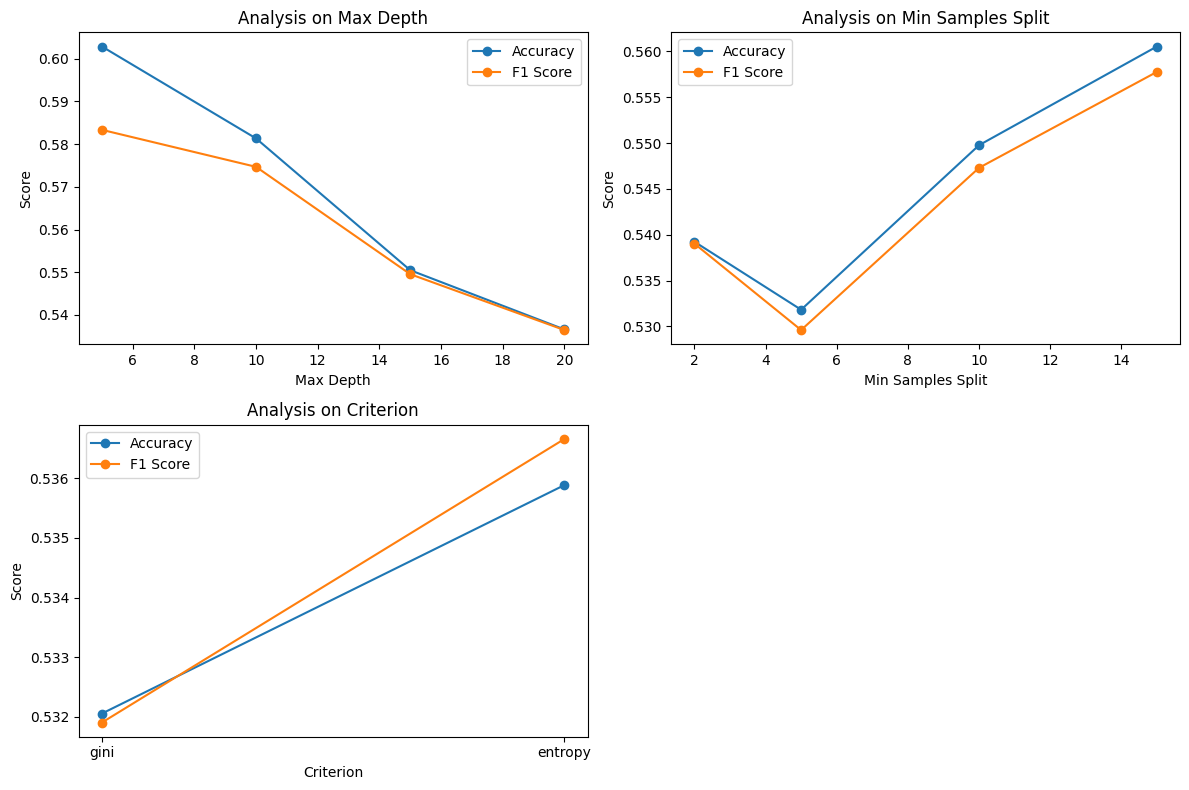

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_data(filepath):
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    return X, y

def decision_tree_find_best_params_avg(X, y, n_splits=5):
    param_grid = {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10, 15],
        'criterion': ['gini', 'entropy']
    }
    
    best_params = None
    best_avg_accuracy = 0
    best_avg_f1 = 0
    best_model = None

    # Collect data for plotting
    depth_results = []
    split_results = []
    criterion_results = []

    for max_depth in param_grid['max_depth']:
        depth_accuracies = []
        depth_f1_scores = []
        
        for _ in range(n_splits):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
            dt_clf = DecisionTreeClassifier(max_depth=max_depth)
            dt_clf.fit(X_train, y_train)
            y_pred = dt_clf.predict(X_test)
            depth_accuracies.append(accuracy_score(y_test, y_pred))
            depth_f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        
        depth_results.append((max_depth, np.mean(depth_accuracies), np.mean(depth_f1_scores)))

    for min_samples_split in param_grid['min_samples_split']:
        split_accuracies = []
        split_f1_scores = []
        
        for _ in range(n_splits):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
            dt_clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
            dt_clf.fit(X_train, y_train)
            y_pred = dt_clf.predict(X_test)
            split_accuracies.append(accuracy_score(y_test, y_pred))
            split_f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        
        split_results.append((min_samples_split, np.mean(split_accuracies), np.mean(split_f1_scores)))

    for criterion in param_grid['criterion']:
        criterion_accuracies = []
        criterion_f1_scores = []
        
        for _ in range(n_splits):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
            dt_clf = DecisionTreeClassifier(criterion=criterion)
            dt_clf.fit(X_train, y_train)
            y_pred = dt_clf.predict(X_test)
            criterion_accuracies.append(accuracy_score(y_test, y_pred))
            criterion_f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        
        criterion_results.append((criterion, np.mean(criterion_accuracies), np.mean(criterion_f1_scores)))

    # Plotting results
    plt.figure(figsize=(12, 8))

    # Max Depth Analysis
    plt.subplot(2, 2, 1)
    depths, accuracies, f1_scores = zip(*depth_results)
    plt.plot(depths, accuracies, marker='o', label='Accuracy')
    plt.plot(depths, f1_scores, marker='o', label='F1 Score')
    plt.xlabel('Max Depth')
    plt.ylabel('Score')
    plt.title('Analysis on Max Depth')
    plt.legend()

    # Min Samples Split Analysis
    plt.subplot(2, 2, 2)
    splits, accuracies, f1_scores = zip(*split_results)
    plt.plot(splits, accuracies, marker='o', label='Accuracy')
    plt.plot(splits, f1_scores, marker='o', label='F1 Score')
    plt.xlabel('Min Samples Split')
    plt.ylabel('Score')
    plt.title('Analysis on Min Samples Split')
    plt.legend()

    # Criterion Analysis
    plt.subplot(2, 2, 3)
    criteria, accuracies, f1_scores = zip(*criterion_results)
    plt.plot(criteria, accuracies, marker='o', label='Accuracy')
    plt.plot(criteria, f1_scores, marker='o', label='F1 Score')
    plt.xlabel('Criterion')
    plt.ylabel('Score')
    plt.title('Analysis on Criterion')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    decision_tree_find_best_params_avg(X, y, n_splits=5)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

def load_data(filepath):
    """Load the Abalone data from a CSV file."""
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  # Features
    y = data['Rings']  # Target
    return X, y

def decision_tree_experiment(X, y, n_experiments=5):
    """Run Decision Tree experiments with different train/test splits and hyperparameters."""
    best_model = None
    best_accuracy = 0
    best_f1 = 0
    best_params = None
    
    results = []
    
    # Define hyperparameter space
    max_depths = [None, 5, 10, 15]
    min_samples_splits = [2, 5, 10]

    for experiment in range(n_experiments):
        # Randomly select hyperparameters
        max_depth = random.choice(max_depths)
        min_samples_split = random.choice(min_samples_splits)
        
        # Split data randomly
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=experiment)
        
        # Create and train the Decision Tree model
        dt_clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=experiment)
        dt_clf.fit(X_train, y_train)
        
        # Evaluate on train and test sets
        y_train_pred = dt_clf.predict(X_train)
        y_test_pred = dt_clf.predict(X_test)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        
        # Store results
        results.append({
            'experiment': experiment + 1,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'test_f1': test_f1
        })
        
        # Update best model
        if test_accuracy > best_accuracy or (test_accuracy == best_accuracy and test_f1 > best_f1):
            best_model = dt_clf
            best_accuracy = test_accuracy
            best_f1 = test_f1
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

    # Display results of all experiments
    results_df = pd.DataFrame(results)
    print("Experiment Results:")
    print(results_df)
    
    # Display best model performance and parameters
    print(f"\nBest Model Parameters: {best_params}")
    print(f"Best Test Accuracy: {best_accuracy:.4f}")
    print(f"Best Test F1 Score: {best_f1:.4f}")
    
    # Visualize the best tree
    plt.figure(figsize=(20, 10))
    plot_tree(best_model, feature_names=X.columns, class_names=str(sorted(y.unique())), filled=True, rounded=True)
    plt.title("Best Decision Tree Visualization")
    plt.show()
    
    # Extract and display IF-THEN rules for selected nodes
    tree_rules = export_text(best_model, feature_names=list(X.columns))
    print("\nIF-THEN Rules for Best Decision Tree:")
    print(tree_rules[:1000])  # Display the first 1000 characters of rules

# Run the code
if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    decision_tree_experiment(X, y, n_experiments=5)


In [ ]:
# Experiment PART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def load_data(filepath):
    """
    Load the data and split it into features (X) and target (y).
    """
    data = pd.read_csv(filepath)
    X = data.drop(columns=['Rings'])  
    y = data['Rings']
    return X, y

def decision_tree_post_pruning(X, y, selected_features=None, n_splits=5):
    """Find the best post-pruning parameter (ccp_alpha) for Decision Tree using average performance."""
    
    # Initialize variables to track the best model and its parameters
    best_ccp_alpha = None
    best_avg_accuracy = 0
    best_avg_f1 = 0
    best_model = None
    
    # Split the data once to determine the range of ccp_alpha values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    dt = DecisionTreeClassifier(random_state=0)
    path = dt.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas  # Get range of ccp_alpha values for pruning

    # Iterate over each value of ccp_alpha
    for ccp_alpha in ccp_alphas:
        accuracies = []
        f1_scores = []
        
        # Perform n_splits train-test splits and evaluate the model
        for _ in range(n_splits):
            # Split the data randomly
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
            
            # Initialize the decision tree with the current ccp_alpha value
            dt_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
            dt_pruned.fit(X_train, y_train.values.ravel())
            
            # Predict and evaluate
            y_pred = dt_pruned.predict(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        
        # Calculate average accuracy and F1 score for the current ccp_alpha
        avg_accuracy = np.mean(accuracies)
        avg_f1 = np.mean(f1_scores)
        
        print(f"ccp_alpha: {ccp_alpha:.4f} - Average Accuracy: {avg_accuracy:.4f}, Average F1 Score: {avg_f1:.4f}")
        
        # Check if this is the best model so far
        if avg_f1 > best_avg_f1 or (avg_f1 == best_avg_f1 and avg_accuracy > best_avg_accuracy):
            best_avg_f1 = avg_f1
            best_avg_accuracy = avg_accuracy
            best_ccp_alpha = ccp_alpha
            best_model = dt_pruned
    
    print(f"\nBest ccp_alpha: {best_ccp_alpha} - Best Average Accuracy: {best_avg_accuracy:.4f}, Best Average F1 Score: {best_avg_f1:.4f}")
    return best_model, best_ccp_alpha

if __name__ == '__main__':
    X, y = load_data('C:/Users/Admin/Desktop/NN_assignment3/data/abalone.csv')
    decision_tree_post_pruning(X, y, selected_features=None, n_splits=5)